# Part 2: Pandas and Matplotlib

In [2]:
# ignore the warnings when loading matplotlib
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Question 2.1: (5 pts)

Load the CSV file `/datasets/spotify_songs.csv` into a variable `spotify_pd` using Pandas

In [3]:
# YOUR CODE HERE
spotify_pd = pd.read_csv('/datasets/spotify_songs.csv')
#raise NotImplementedError()

In [4]:
assert spotify_pd.shape == (2009, 15)
assert list(spotify_pd.columns) ==  ['song_title',
 'artist',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence']

## Question 2.2: (10 pts)

Add a column named `z_loudness` to `spotify_pd` that contains the standardized loudness score. i.e., for each loadness $l_i$, compute $z_i$ as follows

$$z_i = \frac{l_i - \hat{l}}{\text{std(l)}}$$

where $\hat{l}$ is the mean of loadness and $\text{std(l)}$ is the standard deviation of loadness.

Create a variable `top_z` that contains a Pandas dataframe whose $z_i$ score is more than 1.5 and only with the `song_title` and the `z_loudness` columns, sorted by `z_loudness` from highest to lowest. You can modify `spotify_pd` while you produce `top_z`

The first three rows should look like this:

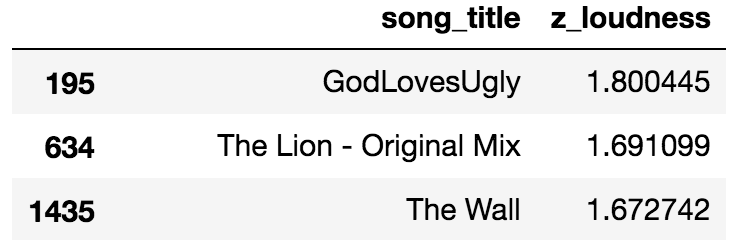

In [5]:
# YOUR CODE HERE
loudness = spotify_pd['loudness']
l_mean = loudness.mean() 
l_std = loudness.std()
spotify_pd['z_loudness'] = loudness.apply(lambda x: (x - l_mean)/l_std)
#raise NotImplementedError()

In [6]:
top_z = spotify_pd[spotify_pd.z_loudness >1.5]
top_z = top_z.sort_values('z_loudness', ascending = False)
top_z = top_z.loc[:,['song_title', 'z_loudness']]

In [7]:
assert list(top_z.columns) == ['song_title', 'z_loudness']
assert top_z.shape == (10, 2)
np.testing.assert_almost_equal(top_z.z_loudness, [1.8004451259549996,
 1.6910992100376612,
 1.6727418664894949,
 1.633366694820964,
 1.617669835844996,
 1.5743039373181682,
 1.5660564351443544,
 1.5474330431389682,
 1.5184337613020098,
 1.5165714221014712])

## Question 2.3 (5 pts)

Do a histogram plot of `duration_ms` for `spotify_pd` and put proper labels. The plot should look like this:

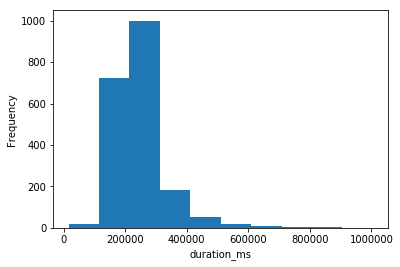

Text(0.5,1,'Histogram of Durantion im ms')

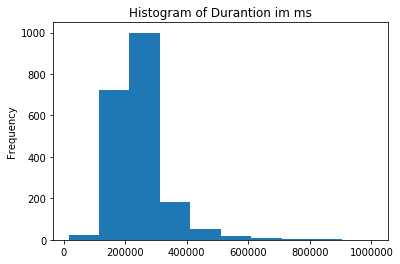

In [8]:
# YOUR CODE HERE
plt.figure()
spotify_pd['duration_ms'].plot(x='duration_ms', kind='hist',y="Frequency")
plt.title('Histogram of Durantion im ms')
#raise NotImplementedError()

# Question 2.4 (5 pts)

Do a scatter plot between `duration_ms` (x axis) and `danceability` (y axis)

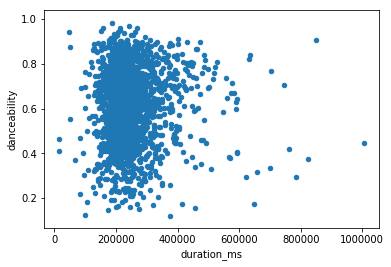

In [9]:
# YOUR CODE HERE# this plots both series
spotify_pd[['duration_ms', 'danceability']].plot(x='duration_ms', y='danceability', kind='scatter');
display();
#raise NotImplementedError()

Comment below: Just by looking at the plot, do you see any relationship between danceability and duration?

Looking at the above plot, we can say that the songs with less duration are more preferred for dance. For most of the songs, the range is 5 mins to 10 mins. For this range, the danceability ranges from 0.2 to 0.9 which is more than any other duration. There are a few exception to this theory which are supported by the outliers in the above plot. 